# Notebook 13

## Aplicaciones de EDO

#### Python 🐍

> Dr. Ricardo Méndez Fragoso $\mathbb{R} i \vec c \hbar$

En las [notas del curso](http://sistemas.fciencias.unam.mx/~rich/FisComp/) se explican las ecuaciones de una estrella con dos pequeños planetas que pueden interactuar gravitacionalmente. Este sistema tiene la simplificación de que el centro de masa se encuentra prácticamente concentrado en la estrella y por ello ésta se puede considerar fija. A continuación examinaremos algunos ejemplos sobre el movimiento de estos planetas y los aterrizaremos con algunos datos reales.

Las bibliotecas que utilizaremos en este notebook son las siguientes:

In [1]:
from pylab import *
from scipy.integrate import *

De acuerdo con las [notas del curso](http://sistemas.fciencias.unam.mx/~rich/FisComp/) la estrella se puede considerar fija debido a que su masa es mucho más grande que la de los planetas, y de esta manera el movimiento planetario únicamente es la atracción con la estrella con una pequeña perturbación mediada por el cociente de los planetas y la masa de la estrella. Las intensidad de la perturbación es $\mu$, las unidades de tiempo están en términos de $\tau = \sqrt{GM}t$ y las distancias se encuentran en unidades astronómicas, pensando que el planeta más cercano podría ser la Tierra. De esta manera las ecuaciones diferenciales a programar son:

$$\begin{eqnarray}
\frac{d^2 \vec r_1}{d\tau^2} & = & - \frac{\vec r_1}{r_1 ^3} + \mu_2 \frac{\vec r_2 - \vec r_1}{|\vec r_2 - \vec r_1|^3} \\
\frac{d^2 \vec r_2}{d\tau^2} & = & - \frac{\vec r_2}{r_2 ^3} - \mu_1 \frac{\vec r_2 - \vec r_1}{|\vec r_2 - \vec r_1|^3}
\end{eqnarray}
$$
donde $\mu_1 =\frac{m_1}{M}$ y $\mu _2=\frac{m_2}{M}$. Si escribimos las ecuaciones anteriores como un sistema de ecuaciones diferenciales de primer orden se obtiene:
$$\begin{eqnarray}
\frac{d \vec r_1}{d\tau} &=& \vec v_1 \\
\frac{d \vec v_1}{d\tau} &=& - \frac{\vec r_1}{r_1 ^3} + \mu_2 \frac{\vec r_2 - \vec r_1}{|\vec r_2 - \vec r_1|^3} \\
\frac{d \vec r_2}{d\tau} &=& \vec v_2 \\
\frac{d \vec v_2}{d\tau} &=& - \frac{\vec r_2}{r_2 ^3} - \mu_1 \frac{\vec r_2 - \vec r_1}{|\vec r_2 - \vec r_1|^3}
\end{eqnarray}
$$

Otra consideración es que el movimiento se realiza en el plano $xy$, algo que es muy cercano en la realidad. Hay que recordar que cada ecuación consta de dos coordenadas, ya que son ecuaciones vectoriales. De esta manera las ecuaciones anteriores quedan programadas en la siguiente función:

In [2]:
def sist_2planet(t,x,mus):
    # x1,y1,vx1,vy1, x2,y2,vx2,vy2
    # 0 , 1, 2 , 3 , 4, 5 , 6 , 7
    r1_cub = ( x[0]**2 + x[1]**2 )**1.5
    r2_cub = ( x[4]**2 + x[5]**2 )**1.5
    r12_cub = ( (x[0]-x[4])**2 + (x[1]-x[5])**2 )**1.5
    dx = np.zeros(len(x))
    dx[0] = x[2]
    dx[1] = x[3]
    dx[2] = -x[0]/r1_cub + mus[1]*((x[4]-x[0])/r12_cub)
    dx[3] = -x[1]/r1_cub + mus[1]*((x[5]-x[1])/r12_cub)
    dx[4] = x[6]
    dx[5] = x[7]
    dx[6] = -x[4]/r2_cub - mus[0]*((x[4]-x[0])/r12_cub)
    dx[7] = -x[5]/r2_cub - mus[0]*((x[5]-x[1])/r12_cub)
    return dx

Primero realicemos una simulación en la que no hay interacción entre los planetas. Adicional a lo anterior, pongamos a los planetas en órbitas circulares, es decir, en estas unidades $v=1/\sqrt{r}$. El tiempo que dejaremos la simulación será $\tau = 12 \pi$ que representa 6 ciclos del planeta a una distancia unitaria.

In [3]:
x1,y1,vx1,vy1 = 1.0, 0.0, 0.0, 1.0
x2,y2,vx2,vy2 = 1.5, 0.0, 0.0, 1/sqrt(1.5)
p_ini = [x1,y1,vx1,vy1,x2,y2,vx2,vy2]
tf = 12*pi
mus = [0.0,0.0]
sol = solve_ivp(sist_2planet,(0,tf),p_ini,args=(mus,),dense_output=True,rtol=1e-6)

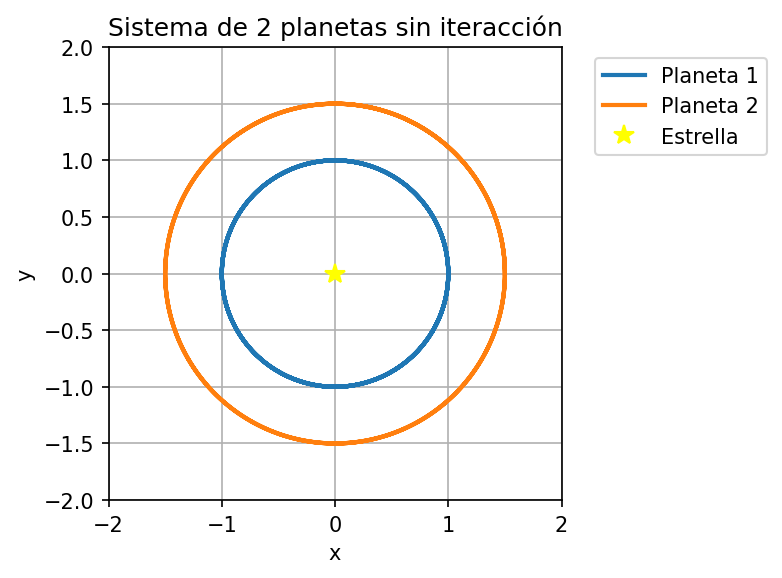

In [4]:
figure(dpi=150)
title("Sistema de 2 planetas sin iteracción"),xlabel("x"),ylabel("y")
t_cont = linspace(0,sol.t[-1],800)
plot(sol.sol(t_cont)[0,:],sol.sol(t_cont)[1,:],lw=2,label="Planeta 1")
plot(sol.sol(t_cont)[4,:],sol.sol(t_cont)[5,:],lw=2,label="Planeta 2")
plot([0],[0],'*',markersize=10,color='yellow',label="Estrella")
xlim([-2,2]),ylim([-2,2])
grid(),legend( bbox_to_anchor=(1.05, 1), loc='upper left'),gca().set_aspect("equal")
show()

Como se puede apreciar, las órbitas son circulares y la precisión que se está utilizando es de $10^{-6}$ para asegurar una buena convergencia. Ahora analicemos los datos que se pueden obtener, en particular la distancia entre los dos planetas a lo largo de la trayectoria. Con la siguiente función calculamos la distancia entre las soluciones de los planetas.

In [5]:
def distancia(func_int,t):
    tray = func_int.sol(t)
    return sqrt( (tray[0,:] -tray[4,:])**2 + (tray[1,:] -tray[5,:])**2  )

En la siguiente gráfica se puede ver la distancia relativa entre los planetas.

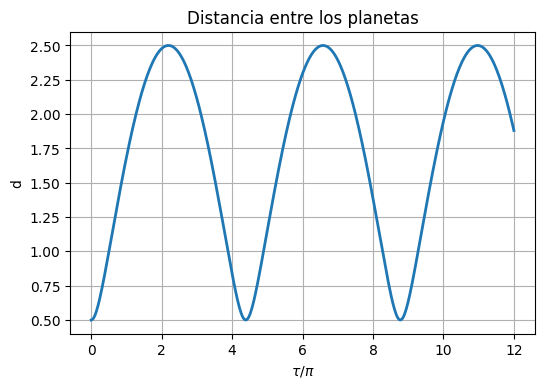

In [6]:
figure(dpi=100)
t_cont = linspace(0,sol.t[-1],500)
d_0 = distancia(sol,t_cont)
title("Distancia entre los planetas"),xlabel(r"$\tau / \pi$"),ylabel("d")
plot(t_cont/pi,d_0,lw=2)
grid()
show()

Como se puede observar, la distancia varía armónicamente entre $0.5$, distancia mínima que coincide con la inicial, y 2.5, que representa la distancia cuando ambos planetas están en posiciones antípodas respecto de la estrella. Este resultado es de esperarse, ya que las trayectorias son circulares y sin interacción. Veamos que sucede si ahora tomamos una velocidad menor para el segundo planeta de tal manera que pueda haber una intersección con la trayectoria del primer planeta. En este caso pondremos $v_{2 \; inicial}=0.65$ y haremos la simulación por un tiempo $\tau = 60 \pi$ que representa 30 vueltas del planeta 1 en torno a la estrella.

In [7]:
x1,y1,vx1,vy1 = 1.0, 0.0, 0.0, 1.0
x2,y2,vx2,vy2 = 1.5, 0.0, 0.0, 0.65
p_ini = [x1,y1,vx1,vy1,x2,y2,vx2,vy2]
tf = 60*pi
mus = [0.0,0.0]
sol = solve_ivp(sist_2planet,(0,tf),p_ini,args=(mus,),dense_output=True,rtol=1e-6)

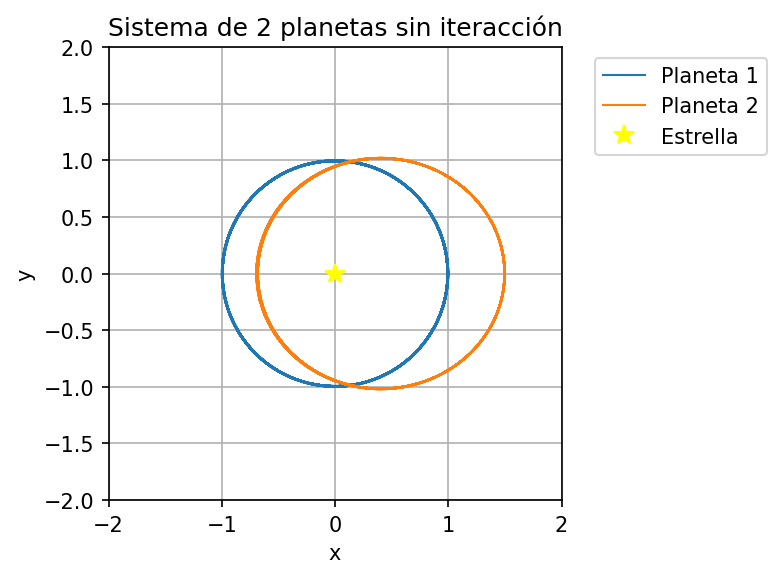

In [8]:
figure(dpi=150)
title("Sistema de 2 planetas sin iteracción"),xlabel("x"),ylabel("y")
t_cont = linspace(0,sol.t[-1],800)
plot(sol.sol(t_cont)[0,:],sol.sol(t_cont)[1,:],lw=1,label="Planeta 1")
plot(sol.sol(t_cont)[4,:],sol.sol(t_cont)[5,:],lw=1,label="Planeta 2")
plot([0],[0],'*',markersize=10,color='yellow',label="Estrella")
xlim([-2,2]),ylim([-2,2])
grid(),legend( bbox_to_anchor=(1.05, 1), loc='upper left'),gca().set_aspect("equal")
show()

Ahora calculemos las distancias entre ambos planetas a lo largo de toda la simulación, en este caso $\tau = 60 \pi$.

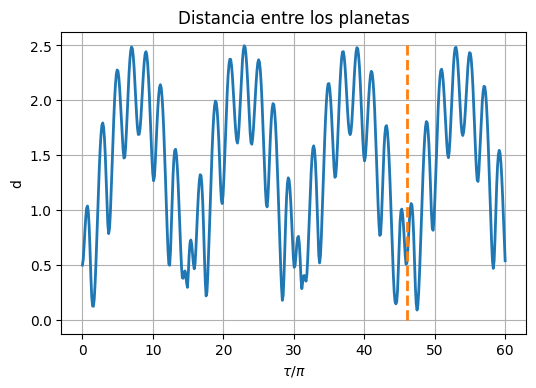

In [9]:
figure(dpi=100)
t_cont = linspace(0,sol.t[-1],500)
d_0 = distancia(sol,t_cont)
title("Distancia entre los planetas"),xlabel(r"$\tau / \pi$"),ylabel("d")
plot(t_cont/pi,d_0,lw=2)
plot([46,46],[0,2.5],'--',lw=2)
grid()
show()

Como se puede observar, las variaciones en la distancia entre los planetas es mucho mayor, aunque los planetas nunca llegan a colisionar. De hecho, después de un rato tiempo determinado, el mínimo común múltiplo de las frecuencias de cada planeta, el patrón se repite. En buena medida, esto se puede predecir debido a que no hay una interacción entre los planetas debido a que las $\mu's =0$. Probemos ahora el sistema de ecuaciones anterior utilizando valores de $\mu_1 =0.001$ y $\mu_2 =0.005$, es decir, planetas con una y cinco milésimas de la masa de la estrella, lo cual es muchísimo en sistemas solares como el nuestro, pero como ejemplo servirá bastante bien.

In [10]:
x1,y1,vx1,vy1 = 1.0, 0.0, 0.0, 1.0
x2,y2,vx2,vy2 = 1.5, 0.0, 0.0, 0.65
p_ini = [x1,y1,vx1,vy1,x2,y2,vx2,vy2]
tf = 60*pi
mus = [0.001,0.005]
sol = solve_ivp(sist_2planet,(0,tf),p_ini,args=(mus,),dense_output=True,rtol=1e-8,atol=1e-8)

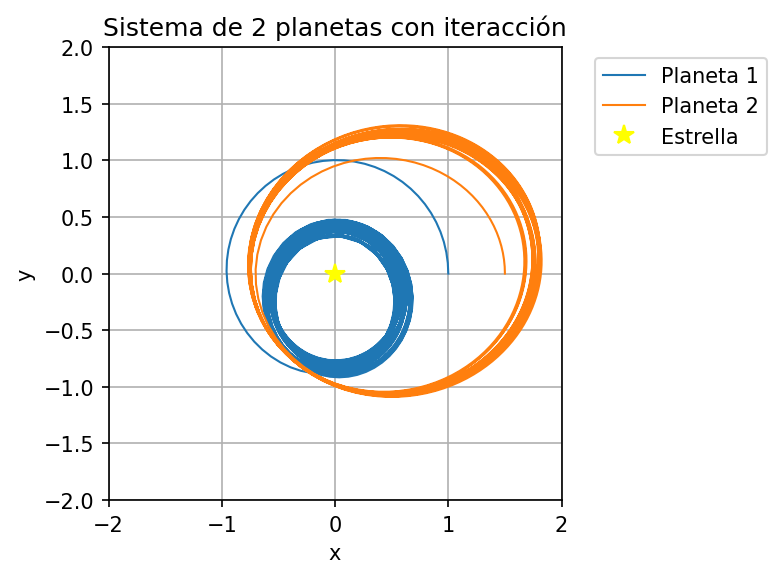

In [11]:
figure(dpi=150)
title("Sistema de 2 planetas con iteracción"),xlabel("x"),ylabel("y")
t_cont_m_neq = linspace(0,sol.t[-1],2000)
plot(sol.sol(t_cont_m_neq)[0,:],sol.sol(t_cont_m_neq)[1,:],lw=1,label="Planeta 1")
plot(sol.sol(t_cont_m_neq)[4,:],sol.sol(t_cont_m_neq)[5,:],lw=1,label="Planeta 2")
plot([0],[0],'*',markersize=10,color='yellow',label="Estrella")
xlim([-2,2]),ylim([-2,2])
grid(),legend( bbox_to_anchor=(1.05, 1), loc='upper left'),gca().set_aspect("equal")
show()

Como se puede observar, en este caso hay una clara influencia en la trayectoria de cada uno de los planetas, y éstos no terminan en las órbitas que originalmente estaban trazadas en los párrafos anteriores. A continuación veremos que sucede con las distancias relativas entre ellos.

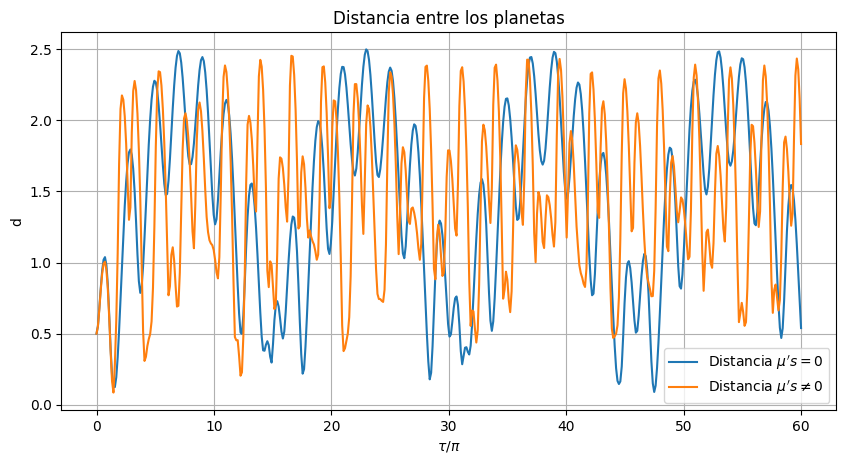

In [12]:
figure(dpi=100,figsize=(10,5))
t_cont_m_neq = linspace(0,sol.t[-1],500)
d_1 = distancia(sol,t_cont_m_neq)
title("Distancia entre los planetas"),xlabel(r"$\tau / \pi$"),ylabel("d")
plot(t_cont/pi,d_0,lw=1.5,label=r"Distancia $\mu 's= 0$")
plot(t_cont_m_neq/pi,d_1,lw=1.5,label=r"Distancia $\mu 's \neq  0$")
grid(),legend()
show()

Como se puede observar, a pesar de que si hay una interacción entre los dos planetas no hay una colisión en el mismo intervalo de tiempo que en el ejemplo anterior. Este tipo de sistemas son muy interesantes, ya que exhiben una dinámica muy complicada y si el lector así lo desea, se puede analizar con mayor detenimiento la energía total y de cada planeta, momento angular total y de cada planeta, ver si en algún momento estos planetas llegan a colisionar, periodicidad de las órbitas, etc. Ese tipo de análisis resulta en simulaciones que suelen durar mucho tiempo, tanto en tiempo de cómputo como en tiempo propio de la simulación. Actualmente se realizan simulaciones parecidas a la anterior pero con asteroides o cuerpos celestes pequeños que puedan colisionar con algún planeta.

### Movimiento planetario en un caso más real

Veamos un ejemplo más realista, y para ello tomemos el ejemplo aproximado en el que los dos planetas representan a la Tierra y Júpiter. Los datos de estos cuerpos celestes son:

| Masas | Distancias | Velocidades tangenciales | Periodos
|:------:|:------:|:------:|:------:|
| $$M_S = 1.989 \times 10^{30} \textrm{ kg}$$ | - | - | - |
| $$M_T = 5.972 \times 10^{24} \textrm{ kg}$$ | $$d_{S-T} = 1 \textrm{ UA}$$ |  $$v_T = 29.78 \textrm{ km/s}$$ | $$T_T =1 \textrm{  año}$$ |
| $$M_J = 1.898 \times 10^{27} \textrm{ kg}$$ | $$d_{S-J} = 5.2 \textrm{ UA}$$ |  $$v_J = 13.07 \textrm{ km/s}$$ | $$T_J = 11.86 \textrm{  años}$$ |

Los parámetros escalados a las unidades que requiere nuestra simulación son los siguientes:

| $$\mu's$$ | Distancias | Velocidades tangenciales | Periodos
|:------:|:------:|:------:|:------:|
| $$\mu_T = 3.002 \times 10^{-6}$$ | $$d_{S-T} = 1$$ |  $$v_T = 1 $$ | $$T_T = 2\pi$$ |
| $$\mu_J = 9.542 \times 10^{-4}$$ | $$d_{S-J} = 5.2$$ |  $$v_J = 0.438 $$ | $$T_J = 23.72 \pi $$ |

En este caso, sin pérdida de generalidad iniciemos la simulación cuando ambos planetas están alineados y en ese punto los planetas llevan la velocidad tangencial de las tablas anteriores.

In [13]:
x1,y1,vx1,vy1 = 1.0, 0.0, 0.0, 1.0
x2,y2,vx2,vy2 = 5.2, 0.0, 0.0, 0.438
p_ini = [x1,y1,vx1,vy1,x2,y2,vx2,vy2]
tf = 24*pi
mus = [3.002e-6,9.542e-4]
sol = solve_ivp(sist_2planet,(0,tf),p_ini,args=(mus,),dense_output=True,rtol=1e-8,atol=1e-8)

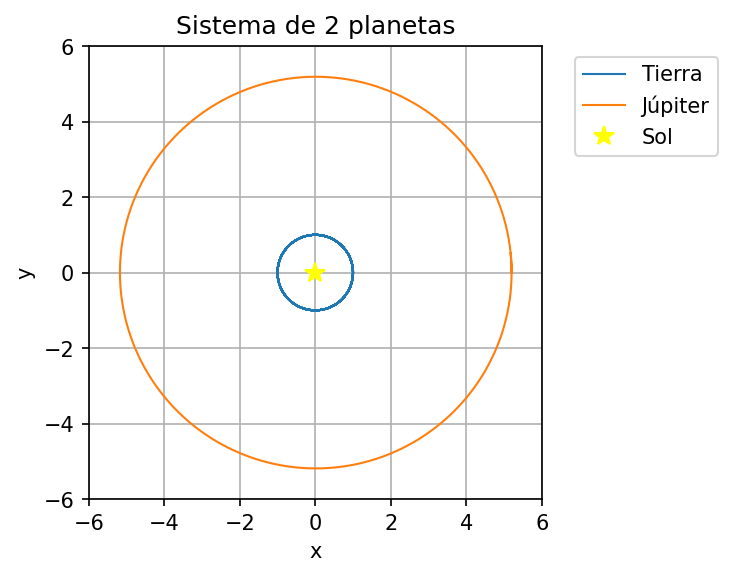

In [14]:
figure(dpi=150)
title("Sistema de 2 planetas"),xlabel("x"),ylabel("y")
t_cont = linspace(0,sol.t[-1],2000)
plot(sol.sol(t_cont)[0,:],sol.sol(t_cont)[1,:],lw=1,label="Tierra")
plot(sol.sol(t_cont)[4,:],sol.sol(t_cont)[5,:],lw=1,label="Júpiter")
plot([0],[0],'*',markersize=10,color='yellow',label="Sol")
xlim([-6,6]),ylim([-6,6])
grid(),legend( bbox_to_anchor=(1.05, 1), loc='upper left'),gca().set_aspect("equal")
show()

En este caso vemos que debido a las masas de los planetas y la distancia a la que interaccionan no hay una gran influencia uno con el otro. Por esta razón en muchas ocasiones no se consideran las interacciones planetarias en el caso de nuestro sistema solar. De hecho la distancia relativa entre los planetas es muy parecida a la que se tendría no no tuviesen interacción como se muestra en la siguiente gráfica.

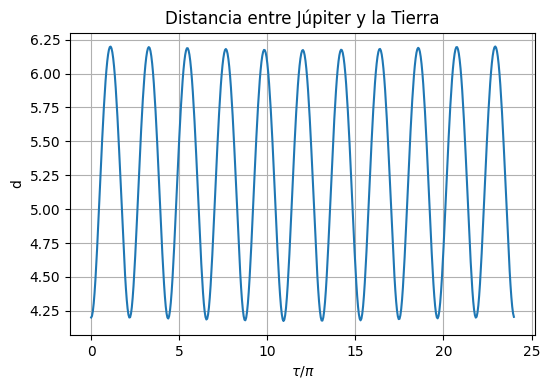

In [15]:
figure(dpi=100)
t_cont = linspace(0,sol.t[-1],500)
d_TJ = distancia(sol,t_cont)
title("Distancia entre Júpiter y la Tierra"),xlabel(r"$\tau / \pi$"),ylabel("d")
plot(t_cont/pi,d_TJ,lw=1.5)
grid()
show()

Como se puede apreciar, las simulaciones del sistema solar involucran en un primer paso conocer las soluciones numéricas para posteriormente hacer un análisis mucho más profundo sobre el comportamiento dinámico de sistema. En otros notebooks que se encuentran en mi [página de internet](http://sistemas.fciencias.unam.mx/~rich/Herramientas/) y en la del [curso](http://sistemas.fciencias.unam.mx/~rich/FisComp/) se pueden encontrar otros ejemplos.

[Regresar a la página del curso.](http://sistemas.fciencias.unam.mx/~rich/FisComp/)

Se agradece el apoyo del proyecto DGAPA-PAPIME:

+ PE 103021 nueva versión durante el año 2022. Versión interactiva en Colab.
+ PE 112919 durante el año 2020. Idea original.